In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [6]:
torch.__version__

'2.1.0+cu118'

## Tensores

In [7]:
# Scalar
scalar = torch.tensor(7)

In [8]:
scalar.ndim

0

In [9]:
# Recuperarlo como tipo int
scalar.item()

7

In [10]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [11]:
vector.ndim

1

In [12]:
vector.shape

torch.Size([2])

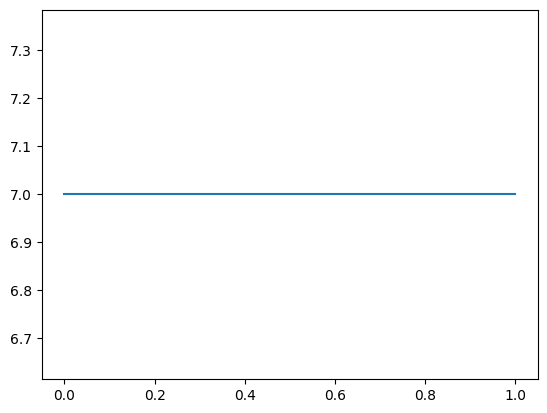

In [13]:
plt.plot(vector)

In [14]:
# Matrix
matrix = torch.tensor([[7, 8], [9, 10]])
matrix

tensor([[ 7,  8],
        [ 9, 10]])

In [15]:
matrix.ndim

2

In [16]:
matrix.shape

torch.Size([2, 2])

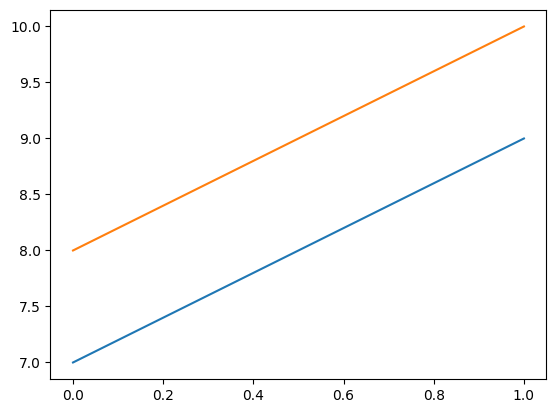

In [17]:
plt.plot(matrix)

In [18]:
matrix[0]

tensor([7, 8])

In [19]:
matrix[1]

tensor([ 9, 10])

In [20]:
# Tensor
tensor = torch.tensor([[[1, 2, 3], [3, 6, 9], [2, 4, 5]]])
tensor

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [21]:
 tensor.ndim

3

In [22]:
tensor.shape

torch.Size([1, 3, 3])

In [23]:
tensor[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

In [24]:
tensor[0][0]

tensor([1, 2, 3])

# Random Tensor
### Son importantes dado que muchas RNN empiezan con los valores aleatorios y, en base a las iteraciones, van ajustando esos valores (pesos

In [25]:
ran_tensor = torch.rand(1, 3, 4)
ran_tensor

tensor([[[0.7956, 0.9044, 0.1388, 0.5852],
         [0.9894, 0.1671, 0.4212, 0.5410],
         [0.0880, 0.8705, 0.6010, 0.1256]]])

In [26]:
ran_tensor.ndim

3

In [27]:
ran_tensor.shape

torch.Size([1, 3, 4])

In [28]:
# Random tensor con la dimensión de un tensor de imagen
ran_img_tensor = torch.rand(size=(3, 224, 224)) # Canal de color (R, G, B), Altura y Anchura
ran_img_tensor

tensor([[[6.4313e-02, 1.1068e-01, 8.7361e-01,  ..., 4.0872e-01,
          6.9287e-01, 7.0305e-01],
         [3.8149e-01, 2.3792e-01, 7.1875e-01,  ..., 7.4814e-01,
          5.6184e-01, 8.9792e-02],
         [1.1668e-01, 2.1749e-02, 2.9955e-01,  ..., 8.9822e-01,
          6.3486e-01, 9.8244e-01],
         ...,
         [7.2267e-02, 9.7697e-01, 8.7237e-01,  ..., 3.6826e-01,
          1.6658e-01, 6.1404e-02],
         [1.5270e-01, 2.0186e-01, 2.9289e-01,  ..., 3.4885e-02,
          1.7480e-02, 7.6420e-01],
         [3.1119e-01, 7.4019e-01, 5.0095e-01,  ..., 4.6206e-01,
          7.1569e-02, 6.7973e-01]],

        [[6.5057e-01, 8.1526e-01, 9.0101e-01,  ..., 6.4047e-01,
          1.7334e-01, 1.0146e-01],
         [8.3786e-01, 3.0229e-01, 2.6856e-01,  ..., 4.4558e-01,
          8.4193e-01, 9.7838e-01],
         [1.7664e-01, 9.6942e-01, 4.1269e-02,  ..., 2.7619e-01,
          8.4465e-02, 7.6551e-02],
         ...,
         [6.0311e-02, 1.9720e-01, 9.5100e-01,  ..., 5.4330e-01,
          3.195

### Podemos o no poner el parámetro de 'size'

In [29]:
 ran_img_tensor.ndim

3

In [30]:
ran_img_tensor.shape

torch.Size([3, 224, 224])

In [31]:
# Tensor con todo ceros
zeros = torch.zeros([3, 4])
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [32]:
# Tensor con todo unos
ones = torch.ones([3, 4])
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [33]:
ones.dtype

torch.float32

### Casi siempre siempre el tipo de los tensores es de float32 a menos que lo especifiquemos

## Creando un rango de tensores

In [34]:
one_ten = torch.arange(start=0, end=10, step=1)
one_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
# Creando tensores con la misma dimensión que otros
zeros_like = torch.zeros(size=one_ten.shape)
zeros_like

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
## Cambiando los tipos de los tensores

In [37]:
tensor_dtype = torch.tensor([3, 6, 7],
                            dtype=torch.float32, # dtype es el tipo de los datos. Ponerlo en none es como ponerlo por defecto, que es flaot32
                            device="cpu", # device es si está en la 'cpu' o 'cuda'. El default es cpu. Operar con dos tensores tienen que estar en el mismo device
                            requires_grad=False) # Track los gradientes o no en las operacioens. El default es false. Gradientes requieren float y dtype complejos.
tensor_dtype.dtype

torch.float32

## Los errores más comunes al utilizar PyTorch:
### 1. Tensores que no tienen el tipo (dtype) correcto
### 2. Tensores que no tienen la dimensión (ndim) correcta
### 3. Tensores que no están en el sitio (device) correcto

In [38]:
tensor_float16 = tensor_dtype.type(torch.float16)
tensor_float16

tensor([3., 6., 7.], dtype=torch.float16)

In [39]:
tensor_float16 * tensor_dtype

tensor([ 9., 36., 49.])

## Cpger información de los tensores
### 1. Saber el dtype de los tensores 'tensor.dtype'
### 2. Saber la dimensión de los tensores 'tensor.shape'
### 3. Saber el device en el que están los tensores 'tensor.device'

In [47]:
r_tensor = torch.rand(3, 4)
r_tensor

tensor([[0.7083, 0.7564, 0.3503, 0.6052],
        [0.6962, 0.6084, 0.1570, 0.0590],
        [0.5095, 0.5156, 0.4461, 0.5934]])

In [48]:
r_tensor.dtype

torch.float32

In [49]:
r_tensor.shape

torch.Size([3, 4])

In [50]:
r_tensor.device

device(type='cpu')

## Operaciones con tensores
### 1. Adición
### 2. Resta
### 3. Multiplicación
### 4. División
### 5. Multiplciación Matricial


In [4]:
tensor_o = torch.tensor([1, 2, 3])
print(tensor_o)
print(tensor_o + 10)
print(torch.add(tensor_o, 10))
print(tensor_o - 10)
print(tensor_o * 10)
print(torch.mul(tensor_o, 10))
print(tensor_o / 10)

tensor([1, 2, 3])
tensor([11, 12, 13])
tensor([11, 12, 13])
tensor([-9, -8, -7])
tensor([10, 20, 30])
tensor([10, 20, 30])
tensor([0.1000, 0.2000, 0.3000])


### Multiplicación de Matrices

## Hay dos formas principales de abordar la multiplicación matricial en ML/DL

### 1. Multiplicación con Elemento
### 2. Multiplicación de matrices

In [6]:
tensor_o

tensor([1, 2, 3])

In [5]:
torch.matmul(tensor_o, tensor_o)

tensor(14)

### Se puede poner %%time al principio de una celda de código para que te diga el tiempo que tarda en ejecutarse

In [8]:
%%time
value = 0
for i in range(len(tensor_o)):
    value += tensor_o[i] * tensor_o[i]
print(value)

tensor(14)
CPU times: total: 0 ns
Wall time: 4 ms


In [9]:
%%time

print(torch.matmul(tensor_o, tensor_o))

tensor(14)
CPU times: total: 0 ns
Wall time: 1 ms


In [14]:
tensor_A = torch.tensor([[1,2],
                         [3, 4],
                         [5, 6]])
tensor_B = torch.tensor(([[7, 10],
                          [8, 11]]))

In [15]:
# Es lo mismo matmul que mm, pero mm solo sirve para matrices, no sirve para vectores
print(torch.matmul(tensor_A, tensor_B))
print(torch.mm(tensor_A, tensor_B))

tensor([[ 23,  32],
        [ 53,  74],
        [ 83, 116]])
tensor([[ 23,  32],
        [ 53,  74],
        [ 83, 116]])


In [16]:
tensor_B = torch.tensor(([[7, 10],
                          [8, 11],
                          [9, 12]]))

### Para solucionar problemas de dimensión, podemos cambiar la dimensión con transpose

In [17]:
tensor_B

tensor([[ 7, 10],
        [ 8, 11],
        [ 9, 12]])

In [20]:
tensor_B.T

tensor([[ 7,  8,  9],
        [10, 11, 12]])

In [21]:
torch.mm(tensor_A, tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [22]:
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

In [28]:
tensor = torch.arange(0, 100, 10,dtype=float)
tensor

tensor([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float64)

In [26]:
tensor.dtype

torch.float64

## Agregaciones de tensores

In [30]:
torch.min(tensor), tensor.min()

(tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64))

In [31]:
torch.max(tensor), tensor.max()

(tensor(90., dtype=torch.float64), tensor(90., dtype=torch.float64))

In [32]:
torch.mean(tensor), tensor.mean()

(tensor(45., dtype=torch.float64), tensor(45., dtype=torch.float64))

In [33]:
torch.sum(tensor), tensor.sum()

(tensor(450., dtype=torch.float64), tensor(450., dtype=torch.float64))

In [35]:
torch.argmax(tensor), tensor.argmax()

(tensor(9), tensor(9))

In [38]:
tensor[torch.argmax(tensor)].item(), tensor[tensor.argmax()].item()

(90.0, 90.0)

In [39]:
torch.argmin(tensor), tensor.argmin()

(tensor(0), tensor(0))

In [40]:
tensor[torch.argmin(tensor)].item(), tensor[tensor.argmin()].item()

(0.0, 0.0)

## Reshaping, stacking, squeezing, unsqueezing

### 1. Reshaping - REdimensiona un tensor
### 2. View - Visualizas un tensor desde otra perspectiva pero no ocupas espacio en memoria extra
### 3. Squeezing -